## Import Basic Libraries

In [1]:
import sklearn 
import numpy as np
import pandas as pd

## Import and Load the data

In [2]:
df1 = pd.read_csv("IMDB Dataset.csv")
df = df1.head(50000)

## EDA(Explotory Data Analysis)

In [3]:
df.head(10)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [4]:
sum(df["sentiment"]=="positive")

25000

In [5]:
sum(df["sentiment"]=="negative")

25000

In [6]:
df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [7]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder().fit_transform(df['sentiment'])
df.insert(2, "Sent_vale", label)
df

,review,sentiment,Sent_vale
0,One of the other reviewers has mentioned that ...,positive,1
1,A wonderful little production. <br /><br />The...,positive,1
2,I thought this was a wonderful way to spend ti...,positive,1
3,Basically there's a family where a little boy ...,negative,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1
...,...,...,...
49995,I thought this movie did a down right good job...,positive,1
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative,0
49997,I am a Catholic taught in parochial elementary...,negative,0
49998,I'm going to have to disagree with the previou...,negative,0


## Data Cleaning

In [8]:
!pip install tweet-preprocessor

In [9]:
import re

Replace_No_Space = re.compile("(\.)|(\;)|(\:)|(\!)|(\')|(\?)|(\,)|(\")|(\|)|(\()|(\))|(\[)|(\])|(\%)|(\$)|(\>)|(\<)|(\{)|(\})")
Replace_With_Spaces = re.compile("(<br\s/><br\s/?)|(-)|(/)|(:).")

In [10]:
import preprocessor as p

def IMDB_Clean(df):
    tempArr = []
    for line in df:
        tmpl = p.clean(line)
        tmpl = Replace_No_Space.sub("",tmpl.lower())
        tmpl = Replace_With_Spaces.sub(" ",tmpl)
        tempArr.append(tmpl)
    return tempArr

In [11]:
cleaned_review = IMDB_Clean(df["review"])
cleaned_review = pd.DataFrame(cleaned_review)

In [12]:
df["cleaned_review"] = cleaned_review

df.head()

C:\Users\Jaswanthsai\AppData\Local\Temp\ipykernel_18848\2264065100.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["cleaned_review"] = cleaned_review


,review,sentiment,Sent_vale,cleaned_review
0,One of the other reviewers has mentioned that ...,positive,1,one of the other reviewers has mentioned that ...
1,A wonderful little production. <br /><br />The...,positive,1,a wonderful little production br br the film...
2,I thought this was a wonderful way to spend ti...,positive,1,i thought this was a wonderful way to spend ti...
3,Basically there's a family where a little boy ...,negative,0,basically theres a family where a little boy j...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1,petter matteis love in the time of money is a ...


## Train and Test Split

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split( df["cleaned_review"].fillna(' '), df["Sent_vale"], test_size = 0.3, random_state=42, shuffle=True)


## Vectorize

In [14]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(binary=True, stop_words='english')

vectorizer.fit(list(X_train) + list(X_test))

X_train_vec = vectorizer.transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
from sklearn.svm import LinearSVC

In [17]:
lsvc = LinearSVC(verbose=0)
lsvc.fit(X_train_vec,Y_train)
y_pred_svm = lsvc.predict(X_test_vec)

C:\Users\Jaswanthsai\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [18]:
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test,y_pred_svm)*100)

86.18


In [19]:
from sklearn.metrics import classification_report


In [20]:
from sklearn import metrics
import matplotlib.pyplot as plt
fpr, tpr, _ = metrics.roc_curve(Y_test, y_pred_svm)

<AxesSubplot:>

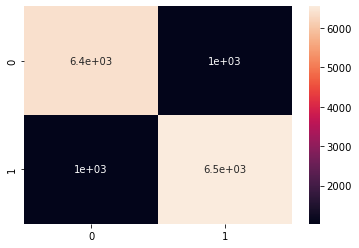

In [21]:
from sklearn.metrics import confusion_matrix ,classification_report
cf_matrix = confusion_matrix(Y_test,y_pred_svm)
import seaborn as sns
sns.heatmap(cf_matrix, annot = True)

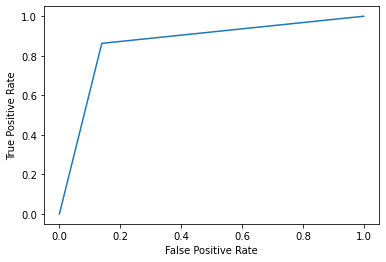

In [22]:
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [23]:
print(cf_matrix)

[[6379 1032]
 [1041 6548]]


In [24]:
from sklearn.linear_model import LogisticRegression